# Sales Forecasting with Linear Regression

### Objective:
In this notebook, I will analyze the historical sales data of the restaurant and use linear regression to forecast future sales. I chose this method mainly because of the lack of seasonality in data trends. I will prepare the data, train a linear regression model, and visualize the predicted sales for the next 30 days.

### Methodology:
1. **Data Preparation**: Aggregate daily sales and convert the date into a numerical feature to be used in the regression model.
2. **Model Training**: A linear regression model will be trained on the past sales data.
3. **Forecasting**: Predict future sales and visualize the results.
4. **Evaluation**: Evaluate the model using performance metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

This analysis will provide a basic linear forecast of the sales trend for the upcoming period.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
#Load data
sales_transactions = pd.read_csv('sales_transactions.csv')

In [42]:
#Total sales per day
sales_transactions['Date'] = pd.to_datetime(sales_transactions['Date'])
daily_sales = sales_transactions.groupby('Date')['Quantity'].sum().reset_index()

In [44]:
# Convert the date into a numerical value
daily_sales['Date_Ordinal'] = (daily_sales['Date'] - daily_sales['Date'].min()).dt.days

## Train the Linear Regression Model

In [47]:
# Define the model and fit it to the data
X = daily_sales[['Date_Ordinal']]  # Features (days since start)
y = daily_sales['Quantity']  # Target (daily sales)

In [49]:
# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [51]:
# Make predictions
daily_sales['Predicted'] = model.predict(X)

## Forecast Future Sales

In [54]:
# Define the number of days to forecast (e.g., next 30 days)
forecast_days = 30
future_dates_ordinal = np.arange(daily_sales['Date_Ordinal'].max() + 1, 
                                 daily_sales['Date_Ordinal'].max() + forecast_days + 1).reshape(-1, 1)


In [64]:
# Convert future_dates_ordinal to DataFrame with proper column name
future_dates_ordinal_df = pd.DataFrame(future_dates_ordinal, columns=['Date_Ordinal'])


In [66]:
# Predict future sales
future_sales = model.predict(future_dates_ordinal_df)

In [68]:
# Convert predicted future days back to dates
last_date = daily_sales['Date'].max()
future_dates = [last_date + pd.Timedelta(days=int(i)) for i in future_dates_ordinal.flatten()]

## Results

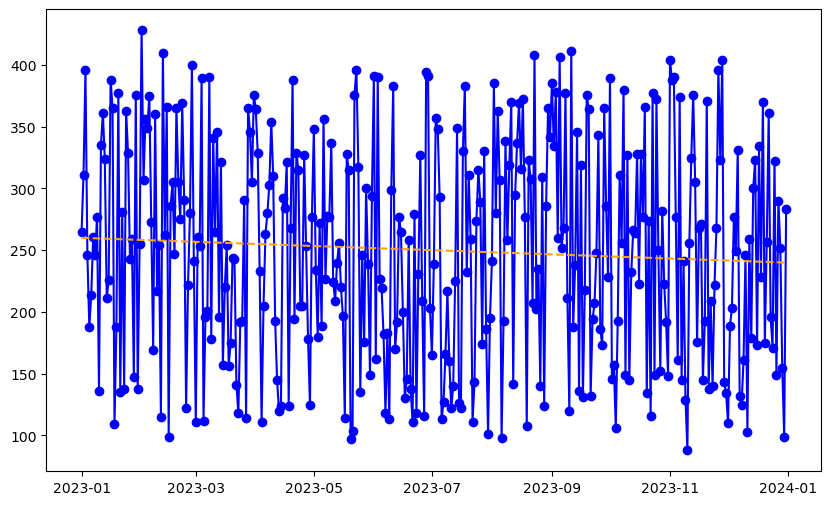

In [84]:
# Plot observed sales and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Quantity'], label='Actual Sales', marker='o', color='blue')
plt.plot(daily_sales['Date'], daily_sales['Predicted'], label='Predicted Sales', color='orange', linestyle='--')
plt.savefig('actual_predicted.png')

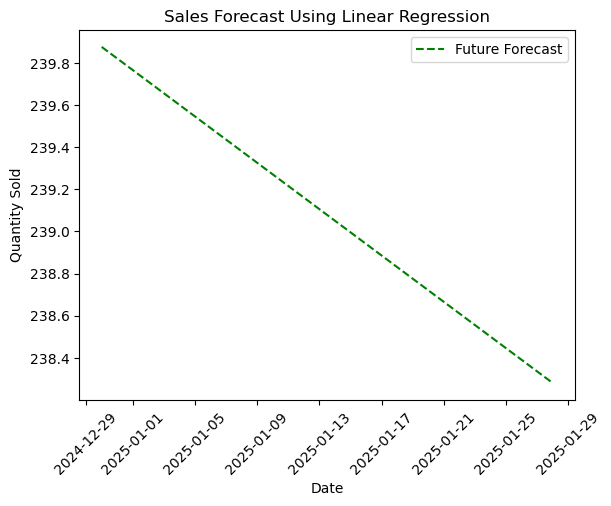

In [88]:
# Plot future forecast
plt.plot(future_dates, future_sales, label='Future Forecast', color='green', linestyle='--')

plt.title('Sales Forecast Using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('sales_forecast.png')
plt.show()


## Evaluate the model

In [76]:
# Evaluate the model's performance on the training data
mae = mean_absolute_error(y, daily_sales['Predicted'])
rmse = np.sqrt(mean_squared_error(y, daily_sales['Predicted']))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 76.03
RMSE: 88.80


## Conclusions
The performance of the linear regression model was evaluated based on MAE and RMSE. Its MAE was 76.03 items, indicating that, on average, the model's predictions were off by 76 items. Its RMSE was 88.80 items, which suggests that while the model provides a reasonable forecast, it struggles with larger fluctuations, as indicated by the higher RMSE value. Generally, the model provides a good baseline for the sales trends forecasting. However, during highly variable periods, it commits mistakes. Therefore, for further improvement of accuracy, more advanced models could be explored.